# Demo for clustering data sets

In this notebook we present general functionalities of the `clustering_data` module.

In [1]:
import PCAfold.clustering_data as cl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import numpy as np

colors = ['#6a6e7a']
k_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
data_point = 2
font_size = 16
save_plots = True

def visualize_clustering(x, y, idx, xticks_list, xlim_list=[-1.1,1.1], xname=r'$var$'):
    
    populations = cl.get_populations(idx)
    n_clusters = len(np.unique(idx))
    figure = plt.figure(figsize=(7, 4))
    figureSubplot = plt.subplot(1,1,1)
    for k in range(0,n_clusters):
        plt.scatter(x[np.where(idx==k)], y[np.where(idx==k)], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(populations[k]))
    plt.axis('equal')
    plt.xlim(xlim_list), plt.ylim([-0.1,1.1])
    plt.xticks(xticks_list), plt.yticks([0,1])
    plt.xlabel(xname)
    plt.grid(alpha=0.2)
    plt.title('Clustered data set', fontsize=font_size)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=2)

Create a synthetic two-dimensional data set:

In [2]:
var = np.linspace(-1,1,100)
y = -var**2 + 1

Plot the synthetic data set:

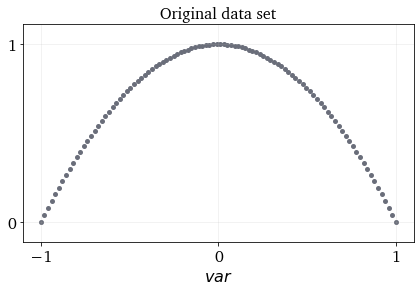

In [3]:
figure = plt.figure(figsize=(7, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(var, y, color=colors[0], marker='.', linewidth=data_point,)
plt.axis('equal')
plt.xlim([-1.1,1.1]), plt.ylim([0,1])
plt.xticks([-1,0,1]), plt.yticks([0,1])
plt.xlabel(r'$var$')
plt.grid(alpha=0.2)
plt.title('Original data set', fontsize=font_size)
if save_plots==True: plt.savefig('../images/tutorial-clustering-original-data-set.png', dpi = 500, bbox_inches='tight')

***

## Clustering based on a single vector

We start with partitioning the synthetic two-dimensional data set based on bins of a variable vector.

### Cluster with `variable_bins` into $k=4$ clusters:

In [4]:
(idx_variable_bins) = cl.variable_bins(var, 4, verbose=True)

Border values for bins:
[-1.0, -0.5, 0.0, 0.5, 1.0]

Bounds for cluster 1:
	-1.0, -0.5152
Bounds for cluster 2:
	-0.4949, -0.0101
Bounds for cluster 3:
	0.0101, 0.4949
Bounds for cluster 4:
	0.5152, 1.0


Visualize clustering of the data set:

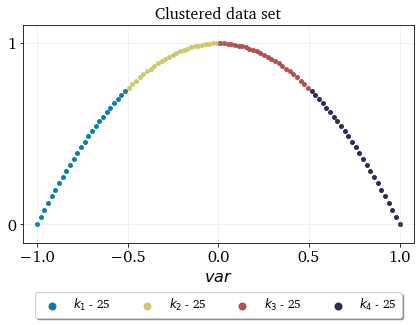

In [5]:
visualize_clustering(var, y, idx_variable_bins, [-1,-0.5,0,0.5,1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

### Cluster with `predefined_variable_bins` into $k=4$ clusters:

In [6]:
split_values = [-0.6, 0.4, 0.8]
(idx_predefined_variable_bins) = cl.predefined_variable_bins(var, split_values, verbose=True)

Border values for bins:
[-1.0, -0.6, 0.4, 0.8, 1.0]

Bounds for cluster 1:
	-1.0, -0.6162
Bounds for cluster 2:
	-0.596, 0.3939
Bounds for cluster 3:
	0.4141, 0.798
Bounds for cluster 4:
	0.8182, 1.0


Visualize clustering of the data set:

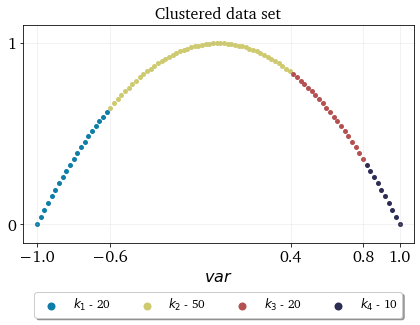

In [7]:
visualize_clustering(var, y, idx_predefined_variable_bins, [-1, -0.6, 0.4, 0.8, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-predefined-variable-bins-k4.png', dpi = 500, bbox_inches='tight')

### Cluster with `pc_source_bins` into $k=3$ clusters with `split_at_zero=True`:

In [8]:
(idx_pc_source_bins) = cl.pc_source_bins(var, 3, zero_offset_percentage=10, split_at_zero=False, verbose=True)

Border values for bins:
[-1.  -0.2  0.2  1. ]

Bounds for cluster 1:
	-1.0, -0.2121
Bounds for cluster 2:
	-0.1919, 0.1919
Bounds for cluster 3:
	0.2121, 1.0


Visualize clustering of the data set:

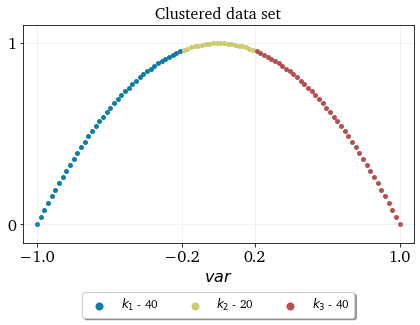

In [9]:
visualize_clustering(var, y, idx_pc_source_bins, [-1, -0.2, 0.2, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-pc-source-bins-k3.png', dpi = 500, bbox_inches='tight')

### Cluster with `pc_source_bins` into $k=4$ clusters with `split_at_zero=True`:

In [10]:
(idx_pc_source_bins_split_at_zero) = cl.pc_source_bins(var, 4, zero_offset_percentage=10, split_at_zero=True, verbose=True)

Border values for bins:
[-1.  -0.2  0.   0.2  1. ]

Bounds for cluster 1:
	-1.0, -0.2121
Bounds for cluster 2:
	-0.1919, -0.0101
Bounds for cluster 3:
	0.0101, 0.1919
Bounds for cluster 4:
	0.2121, 1.0


Visualize clustering of the data set:

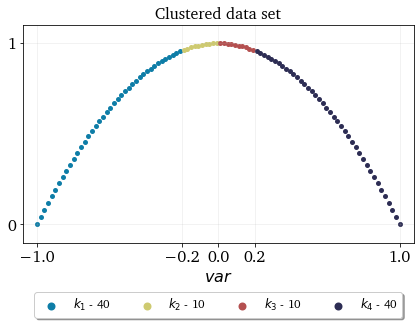

In [11]:
visualize_clustering(var, y, idx_pc_source_bins_split_at_zero, [-1, -0.2, 0, 0.2, 1])
if save_plots==True: plt.savefig('../images/tutorial-clustering-pc-source-bins-split-at-zero-k4.png', dpi = 500, bbox_inches='tight')

### Cluster with `mixture_fraction_bins` into $k=4$ clusters with `Z_stoich=0.4`:

In [12]:
Z = np.linspace(0,1,100)
y_Z = (-25/9)*Z**2 + (20/9)*Z + (5/9)
(idx_mixture_fraction_bins) = cl.mixture_fraction_bins(Z, 4, 0.4, verbose=True)

Border values for bins:
[0.  0.2 0.4 0.7 1. ]

Bounds for cluster 1:
	0.0, 0.1919
Bounds for cluster 2:
	0.202, 0.3939
Bounds for cluster 3:
	0.404, 0.697
Bounds for cluster 4:
	0.7071, 1.0


Visualize clustering of the data set:

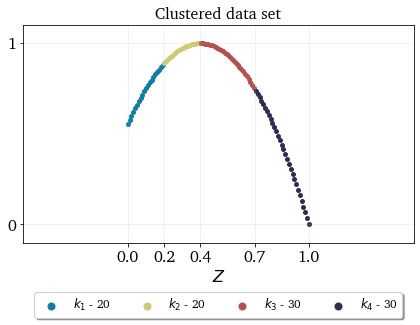

In [14]:
visualize_clustering(Z, y_Z, idx_mixture_fraction_bins, [0, 0.2, 0.4, 0.7, 1], xlim_list=[-0.01,1.01], xname=r'$Z$')
if save_plots==True: plt.savefig('../images/tutorial-clustering-mixture-fraction-bins-k4.png', dpi = 500, bbox_inches='tight')